# Test player-wise Metropolis sampling.

## Setup

In [1]:
import os
import sys

os.chdir("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import load, munge
import src.models.gp

In [145]:
import importlib
importlib.reload(src.load)
importlib.reload(src.munge)
importlib.reload(src.models.gp)

<module 'src.models.gp' from '/Users/yl3/github/dota2/src/models/gp.py'>

## Load data.

In [4]:
matches = load.all_matches_df()

In [5]:
matches_ti9 = matches.loc[matches.league_name == "The International 2019"]
matches_ti9.shape

(268, 15)

In [146]:
players_mat_ti9 = munge.make_match_players_matrix(
    matches_ti9.radiant_players, matches_ti9.dire_players)
players_mat_ti9.shape

(268, 240)

## Get a list of player IDs.

In [147]:
players = munge.player_id_to_player_name(
    pd.concat([matches_ti9.radiant_players, matches_ti9.dire_players]),
    pd.concat([matches_ti9.radiant_nicknames, matches_ti9.dire_nicknames]),
    pd.concat([matches_ti9.radiant_valveId, matches_ti9.dire_valveId]),
    pd.concat([matches_ti9.radiant_name, matches_ti9.dire_name]),)

In [93]:
players.loc[players_mat_ti9.columns[:5]]

,name,team,team_id
3916428,EGM,Bald,Bald
3940262,March,Team Jinesbrus,Team Jinesbrus
4281729,syndereN,Anti-MagE-,Anti-MagE-
6922000,pieliedie,Forward Gaming,Forward Gaming
10366616,Sneyking,Forward Gaming,Forward Gaming


## Run model manually.

In [238]:
two_years_in_ms = 2 * 365 * 24 * 60 * 60 * 1000

In [250]:
import importlib
importlib.reload(src.load)
importlib.reload(src.munge)
importlib.reload(src.models.gp)

<module 'src.models.gp' from '/Users/yl3/github/dota2/src/models/gp.py'>

In [251]:
gp = src.models.gp.SkillsGP(players_mat_ti9.values,
                            matches_ti9.startTimestamp,
                            matches_ti9.radiantVictory,
                            players_mat_ti9.columns.values,
                            "exponential", {"scale": twenty_years_in_ms},
                            propose_sd=0.3, save_every_n_iter=10)

In [252]:
gp.iterate_once_player_wise()

In [253]:
gp.samples

[(0, array([0., 0., 0., ..., 0., 0., 0.]), 0.0, 10020.281916492957)]

In [254]:
for i in range(5):
    display(src.models.gp._dropna(gp.skills_vec_to_mat(gp._cur_skills)[:, i]))

array([0.04553537, 0.04651054, 0.04628823, 0.04550884, 0.04161042,
       0.04073934, 0.04164644])

array([-0.20982257, -0.211633  , -0.21193363, -0.21149064, -0.2107561 ,
       -0.20990836, -0.20977988, -0.20959869, -0.21750053, -0.21729657,
       -0.21743083, -0.21767872, -0.21953553, -0.22040419, -0.21848594,
       -0.21297906, -0.21312036, -0.21026587, -0.20987326])

array([-0.36028361, -0.35985378, -0.36227046, -0.3641237 , -0.36408227,
       -0.36593717, -0.36648081, -0.36602035, -0.36963429])

array([0.25509982, 0.25639896, 0.25678573, 0.25741904, 0.25500205,
       0.25443114, 0.25654539, 0.25638466, 0.25661613, 0.25604735,
       0.25349241, 0.25302417, 0.25382523, 0.25235307, 0.25175896])

array([0.34895842, 0.34908655, 0.34894694, 0.34879667, 0.35185904,
       0.35300451, 0.35426565, 0.35418672, 0.34912003, 0.35416116,
       0.35981009, 0.3585582 , 0.36022512, 0.3600242 , 0.36121222])

### 100 player-wise iterations.

In [255]:
gp.iterate(100, "playerwise")

100% (100 of 100) |######################| Elapsed Time: 0:00:18 Time:  0:00:18


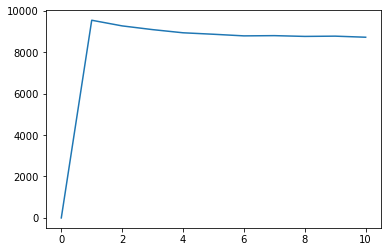

In [256]:
plt.plot([x[2] for x in gp.samples])

In [258]:
[[x[0], x[2], x[3], x[4], x[5]] for x in gp.samples[1:]]

[[10,
  9538.318327813055,
  -0.007839120628586424,
  9715.066819837875,
  -176.74849202482082],
 [20,
  9265.54701024911,
  -0.004045829955046211,
  9434.750772664476,
  -169.20376241536545],
 [30,
  9085.813997571047,
  -0.006308260031707312,
  9259.25924862102,
  -173.44525104997211],
 [40,
  8933.282489741774,
  0.0021976333769392906,
  9102.119078587295,
  -168.83658884552074],
 [50,
  8862.23230180768,
  0.0006319953040553594,
  9029.143119959272,
  -166.9108181515912],
 [60,
  8784.029403796167,
  0.006822151488266769,
  8954.65726324958,
  -170.6278594534141],
 [70,
  8795.381573894261,
  -0.014591104487104344,
  8966.720792061476,
  -171.33921816721445],
 [80,
  8758.467475430629,
  -0.024895789557300763,
  8929.952752101053,
  -171.48527667042396],
 [90,
  8770.600676061656,
  -0.020768371411465977,
  8941.244126040885,
  -170.64344997922848],
 [100,
  8718.611008807951,
  -0.038254068709297824,
  8887.717737512263,
  -169.1067287043113]]

### 1,000 iterations.

In [259]:
gp.iterate(1000, "playerwise")

100% (1000 of 1000) |####################| Elapsed Time: 0:03:01 Time:  0:03:01


In [260]:
[[x[0], x[3], x[4], x[5]] for x in gp.samples[-10:]]

[[1010, 0.13239263731497844, 8860.947910673223, -169.7392085635438],
 [1020, 0.13646575810859687, 8841.113291953858, -164.7294123636451],
 [1030, 0.10022459692741337, 8866.18327088035, -167.5865491946733],
 [1040, 0.0755817159866114, 8857.496914985004, -166.97922020768152],
 [1050, 0.11018000173681074, 8854.259347896634, -173.37323608512511],
 [1060, 0.11093704321291582, 8858.384011220292, -172.8518648370235],
 [1070, 0.10908177619922349, 8849.724563208385, -171.9347267008853],
 [1080, 0.09227617001837131, 8877.238011090152, -171.63727827368965],
 [1090, 0.09423714507002783, 8839.919880960282, -167.94906157385196],
 [1100, 0.08060159565860976, 8829.507341773711, -166.3578029485127]]

In [263]:
gp.samples[-1]

(1100, array([ 1.19314616,  0.31623902,  1.42415447, ..., -0.63647807,
        -0.15582055, -1.25244825]), 8663.149538825199, 0.08060159565860976, 8829.507341773711, -166.3578029485127)

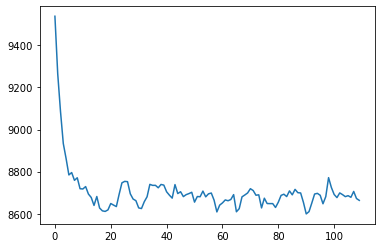

In [262]:
plt.plot([x[2] for x in gp.samples[1:]])

0.004123158505455134

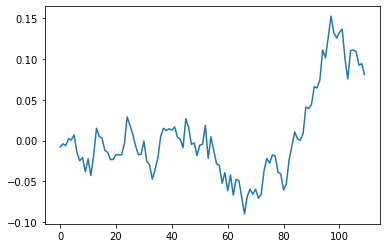

In [266]:
display(np.mean([x[3] for x in gp.samples[1:]]))
plt.plot([x[3] for x in gp.samples[1:]])

## What are skill levels after fitting?

In [267]:
samples = [gp.skills_vec_to_mat(x[1]) for x in gp.samples[20:]]

In [268]:
skills = pd.DataFrame(
    np.mean(samples, axis=0),
    columns=pd.MultiIndex.from_arrays(
        [players.loc[players_mat_ti9.columns, "team"],
        players.loc[players_mat_ti9.columns, "name"]])
)

In [269]:
skills

team Bald Team Jinesbrus Anti-MagE- Forward Gaming           Team Spirit  \
name  EGM          March   syndereN      pieliedie  Sneyking     VANSKOR   
0     NaN            NaN        NaN       1.197138  0.773718         NaN   
1     NaN            NaN        NaN       1.196605  0.772933         NaN   
2     NaN            NaN        NaN       1.196814  0.772795         NaN   
3     NaN            NaN        NaN       1.196264  0.771801         NaN   
4     NaN            NaN        NaN            NaN       NaN         NaN   
5     NaN            NaN        NaN            NaN       NaN         NaN   
6     NaN            NaN        NaN            NaN       NaN         NaN   
7     NaN            NaN        NaN            NaN       NaN         NaN   
8     NaN            NaN        NaN            NaN       NaN         NaN   
9     NaN            NaN        NaN            NaN       NaN         NaN   
10    NaN            NaN        NaN            NaN       NaN         NaN   
11    NaN            NaN        NaN            NaN       NaN         NaN   
12    NaN            NaN        NaN            NaN       NaN         NaN   
13    NaN            NaN        NaN            NaN       NaN         NaN   
14    NaN            NaN        NaN            NaN       NaN         NaN   
15    NaN            NaN        NaN            NaN       NaN         NaN   
16    NaN            NaN        NaN            NaN       NaN         NaN   
17    NaN            NaN        NaN            NaN       NaN         NaN   
18    NaN            NaN        NaN            NaN       NaN         NaN   
19    NaN            NaN        NaN            NaN       NaN         NaN   
20    NaN            NaN        NaN            NaN       NaN         NaN   
21    NaN            NaN        NaN            NaN       NaN         NaN   
22    NaN            NaN        NaN       1.194630  0.777329         NaN   
23    NaN            NaN        NaN       1.193517  0.779101         NaN   
24    NaN            NaN        NaN            NaN       NaN         NaN   
25    NaN            NaN        NaN       1.191824  0.781918         NaN   
26    NaN            NaN        NaN            NaN       NaN         NaN   
27    NaN            NaN        NaN       1.193053  0.780909         NaN   
28    NaN            NaN        NaN            NaN       NaN         NaN   
29    NaN            NaN        NaN            NaN       NaN         NaN   
..    ...            ...        ...            ...       ...         ...   
238   NaN            NaN        NaN            NaN       NaN         NaN   
239   NaN            NaN        NaN            NaN       NaN   -0.208401   
240   NaN            NaN        NaN            NaN       NaN         NaN   
241   NaN            NaN        NaN            NaN       NaN         NaN   
242   NaN            NaN        NaN            NaN       NaN         NaN   
243   NaN            NaN        NaN            NaN       NaN   -0.207535   
244   NaN            NaN        NaN            NaN       NaN         NaN   
245   NaN            NaN        NaN            NaN       NaN         NaN   
246   NaN            NaN        NaN            NaN       NaN         NaN   
247   NaN            NaN        NaN            NaN       NaN         NaN   
248   NaN            NaN        NaN            NaN       NaN         NaN   
249   NaN            NaN        NaN            NaN       NaN         NaN   
250   NaN       0.573904        NaN            NaN       NaN         NaN   
251   NaN            NaN        NaN            NaN       NaN         NaN   
252   NaN            NaN        NaN            NaN       NaN   -0.207694   
253   NaN            NaN        NaN            NaN       NaN         NaN   
254   NaN            NaN        NaN            NaN       NaN         NaN   
255   NaN            NaN        NaN            NaN       NaN         NaN   
256   NaN       0.572906        NaN            NaN       NaN         NaN   
257   NaN            NaN        NaN            N

In [270]:
skills.mean().sort_values()

team                 name            
SG e-sports          4naloG             -0.918898
RESURGENCE           LJSL               -0.761134
Old Suck Gaming      Virsatus           -0.749256
Team Serenity        Zyd                -0.694405
Old Suck Gaming      Empyrean           -0.666833
RESURGENCE           InsidiousC         -0.649618
Team Xolotl          hector             -0.616729
Gorillaz-Pride       ??????????         -0.616352
Team Sirius          ASD                -0.607917
SG e-sports          c4t                -0.594549
Kookaburra           bryle              -0.571546
Team Ham             oliver             -0.571429
Bald                 Stormstormer       -0.567238
BOOM ID              TeravisuParkur     -0.548254
Team Sirius          InJuly             -0.537706
Team Spirit          velheor            -0.534810
Team Singularity     Luft               -0.513192
Team Aster           Q                  -0.494880
Team EVOS            Vlaicu             -0.481379
RESURGENCE  

In [271]:
skills.mean().sort_values().reset_index().groupby("team").sum().sort_values(0, ascending=False)

,0
team,
Forward Gaming,3.953363
Infamous Gaming,3.668191
CDEC,2.272285
Chaos Esports Club,1.914949
Royal Never Give Up,1.839874
Vega Squadron,1.837682
paiN Gaming,1.682504
Natus Vincere,1.652655
Team Jinesbrus,1.519734


In [272]:
src.models.gp.win_prob(3.953363 - 1.082489)

0.639725929331489

### Visualise variance.

In [273]:
idx1 = skills.columns.get_level_values("team") == "Infamous Gaming"

In [274]:
idx2 = skills.columns.get_level_values("team") == "paiN Gaming"

(array([ 3.,  1.,  9.,  9., 13.,  7.,  9., 10.,  6.,  4.]),
 array([0.33022865, 0.92244567, 1.51466269, 2.10687971, 2.69909673,
        3.29131375, 3.88353077, 4.4757478 , 5.06796482, 5.66018184,
        6.25239886]),
 <a list of 10 Patch objects>)

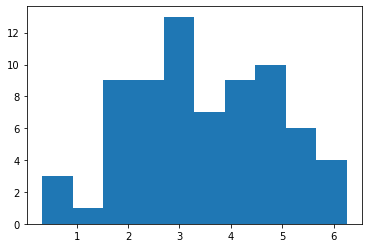

In [275]:
plt.hist([np.nanmean(np.sum(x[:, idx1], axis=1)) for x in samples[20:]])

(array([ 2.,  6., 12.,  7., 15., 12., 11.,  1.,  3.,  2.]),
 array([-2.81186045, -1.83102458, -0.8501887 ,  0.13064717,  1.11148305,
         2.09231892,  3.0731548 ,  4.05399067,  5.03482655,  6.01566242,
         6.9964983 ]),
 <a list of 10 Patch objects>)

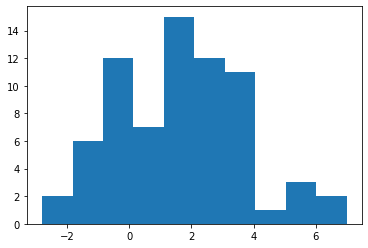

In [276]:
plt.hist([np.nanmean(np.sum(x[:, idx2], axis=1)) for x in samples[20:]])

1.894763773819329

(array([ 3.,  2.,  2.,  8., 10., 14., 10., 13.,  6.,  3.]),
 array([-3.16734913, -2.26925482, -1.3711605 , -0.47306619,  0.42502812,
         1.32312244,  2.22121675,  3.11931106,  4.01740537,  4.91549969,
         5.813594  ]),
 <a list of 10 Patch objects>)

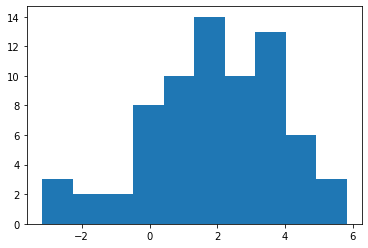

In [279]:
display(np.mean([np.nanmean(np.sum(x[:, idx1], axis=1) - np.sum(x[:, idx2], axis=1)) for x in samples[20:]]))
plt.hist([np.nanmean(np.sum(x[:, idx1], axis=1) - np.sum(x[:, idx2], axis=1)) for x in samples[20:]])

In [280]:
src.models.gp.win_prob(1.894763773819329)

0.5936204953068136

In [281]:
src.models.gp.win_prob(1.894763773819329 + np.mean([x[3] for x in gp.samples[20:]]))

0.5939762075907943